# Analyizing the Titanic dataset from Kaggle.com and building a Logistic Regression model to predict survival

In [31]:
#Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
#Import Titanic CSV File

In [47]:
train = pd.read_csv('titanic_train.csv')

In [ ]:
#Begin Exploratory Data Analysis

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

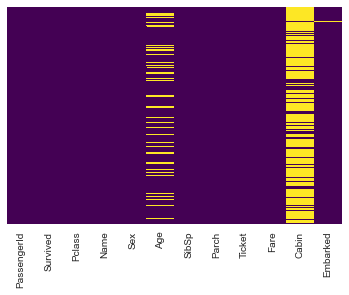

In [49]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#The yellow bars represent data that is missing from the data set. 
#Based on the figure, it seems as though much of the data from the cabin column is missing. 
#There is some data that is missing from the "Age" column but that can be filled with some form of imputation.

In [9]:
sns.set_style('whitegrid')

In [ ]:
#Next, let's look at a rough estimate of how many individuals survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

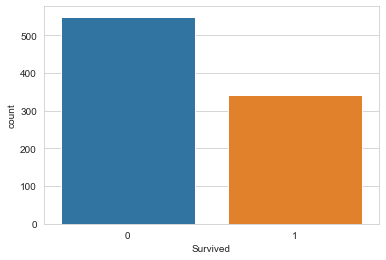

In [34]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

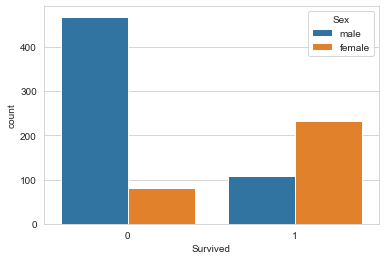

In [33]:
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

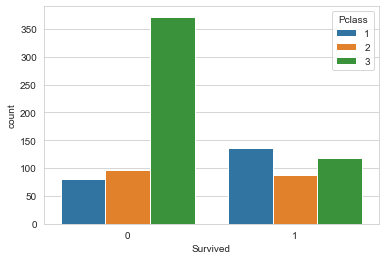

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=train)

In [ ]:
#It seems as though many of the individuals who did not survive were males from the third class

In [ ]:
#Next, let's look at the distribution of ages of the passengers

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

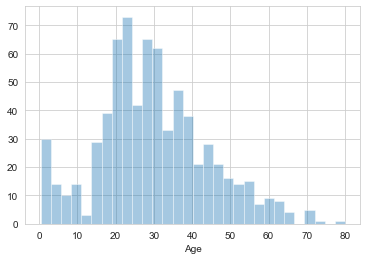

In [50]:
sns.distplot(train['Age'].dropna(), kde = False,bins = 30)

<AxesSubplot:ylabel='Frequency'>

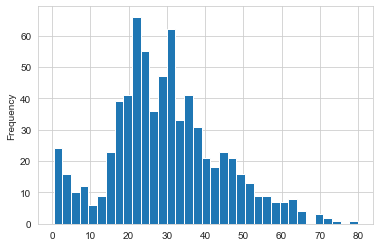

In [17]:
train['Age'].plot.hist(bins=35)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#How many passengers were either solo, or with a sibling or spouse?

<AxesSubplot:xlabel='SibSp', ylabel='count'>

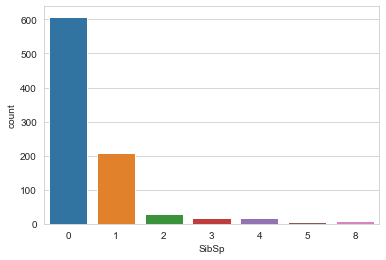

In [20]:
sns.countplot(x='SibSp',data = train)

In [ ]:
#Roughly, what was the fare paid by each passenger?

<AxesSubplot:>

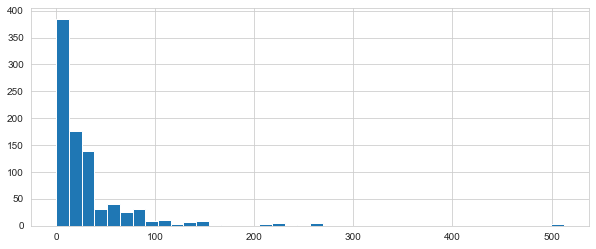

In [24]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [35]:
#Now lets get started cleaning our dataset
#First, lets try and fill in the null data in the "Age" column via imputation
#We're going to try and fill in the null values with the average age of the passengers in class 1 2 and 3

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

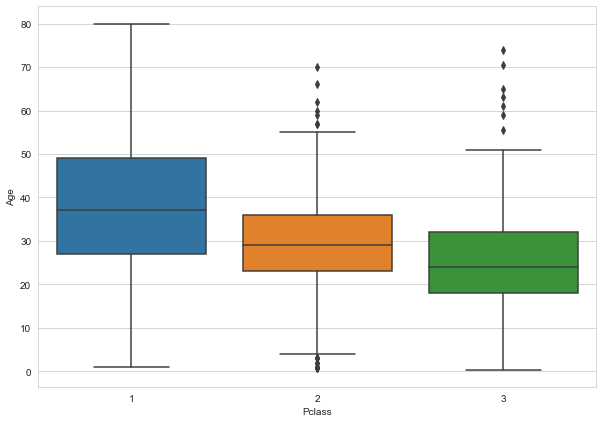

In [39]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y="Age",data=train)

In [51]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: 
        return Age

We created a function that takes in an argument "cols". 

-If the Age is null and the passenger class is 1 then return the age as 37.

-If the Age is null and the passenger class is 2 then return the age as 29.

-If the Age is null and the passenger class is neither 1 or 2 (then the class is 3) then return the age as 24

-If the Age is **not** null then return the age that exists

We then applied this function to both the "Age and "Pclass" columns

In [52]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

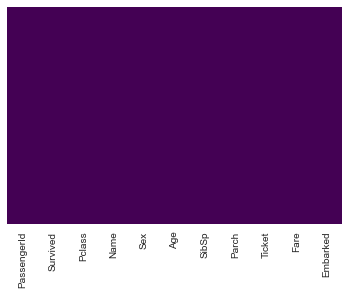

In [61]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#All of the Age column data is filled

In [58]:
#There is too much missing data in the Cabin column so we'll just drop it

In [55]:
train.drop('Cabin',axis=1,inplace=True)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
train.dropna(inplace=True)

In [62]:
#Now we have dealt with all missing values!

In [63]:
#Now we have to convert the categorical data to something that the machine learning algorithm can take in

In [66]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [ ]:
#Using the get_dummies() function to replace the strings with variables
# 0 = false (aka not true)
# 1 = True

#We have to delete either the male or female column to prevent colinearity

In [67]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
#Repeat for Embarked column then concamenate to the DataFrame

In [68]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [69]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [70]:
train = pd.concat([train,sex,embark],axis=1)

In [71]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [72]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [75]:
train.drop('PassengerId',axis=1,inplace=True)

In [76]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


We have successfully cleaned and prepared our dataset and we are now ready to begin building our model. 

We will use **ScikitLearn train test split** in order to do so.

In [77]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [79]:
import sklearn

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logmodel = LogisticRegression()

In [87]:
logmodel.fit(X_train,y_train)

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
predictions = logmodel.predict(X_test)

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [91]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]])